In [1]:
'''
Preliminary examination of data files.

This script simply looks at the data files and checks what is going on. No real analysis here.

Just checking behavior and seeing what we can see.
'''

'\nPreliminary examination of data files.\n\nThis script simply looks at the data files and checks what is going on. No real analysis here.\n\nJust checking behavior and seeing what we can see.\n'

In [2]:
import dataFile as df
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from pylab import rcParams
import matplotlib.cm as mplcm
import matplotlib.colors as colors


In [3]:
filename = '/home/daqpearl/raidStorage/raidStorage/NDTGamma/Dec2019/run43871.bin'
data = df.dataFile(filename)
originalFile = data.origFile()

In [4]:
print(originalFile.dtype)

[('header0', [('word1', '<u4'), ('word2', '<u4'), ('word3', '<u4'), ('word4', '<u4'), ('word5', '<u4')]), ('header1', [('word1', '<u4'), ('word2', '<u4'), ('word3', '<u4'), ('word4', '<u4'), ('word5', '<u4')]), ('waves', [('wave0', '<u2', (500000,)), ('wave1', '<u2', (500000,)), ('wave2', '<u2', (500000,)), ('wave3', '<u2', (500000,)), ('wave4', '<u2', (500000,)), ('wave5', '<u2', (500000,)), ('wave6', '<u2', (500000,)), ('wave7', '<u2', (500000,)), ('wave8', '<u2', (500000,)), ('wave9', '<u2', (500000,)), ('wave10', '<u2', (500000,)), ('wave11', '<u2', (500000,)), ('wave12', '<u2', (500000,)), ('wave13', '<u2', (500000,)), ('wave14', '<u2', (500000,)), ('wave15', '<u2', (500000,))])]


In [5]:
pixels = []
for i in range(16):
    pixels.append(data.getPixel(i))

In [6]:
for pix in pixels:
    print(pix.dtype)

uint16
uint16
uint16
uint16
uint16
uint16
uint16
uint16
uint16
uint16
uint16
uint16
uint16
uint16
uint16
uint16


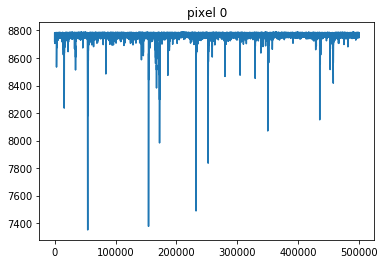

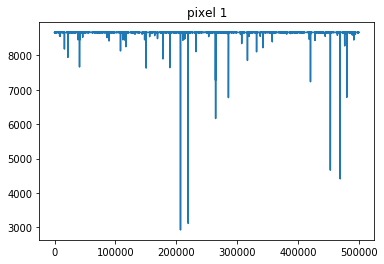

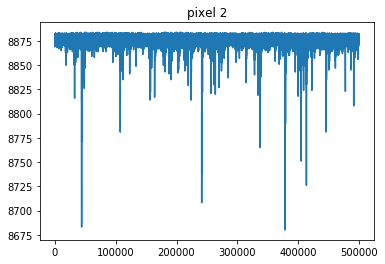

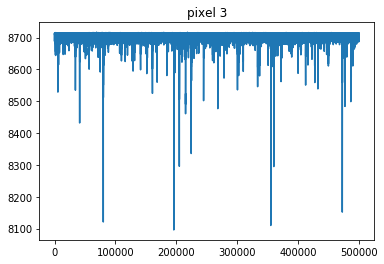

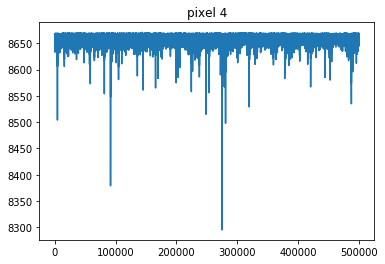

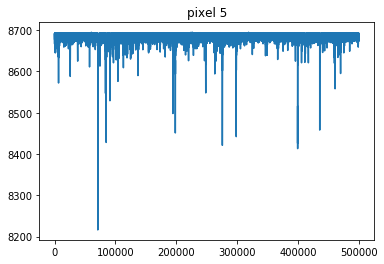

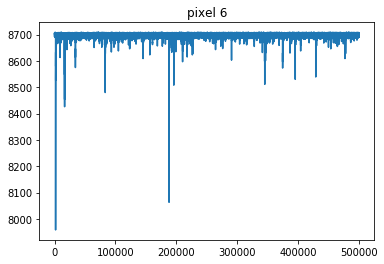

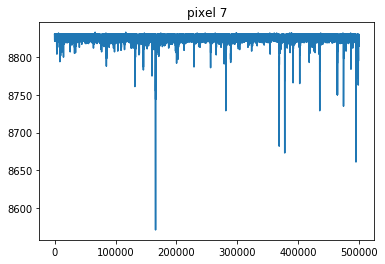

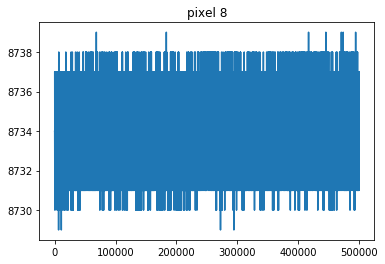

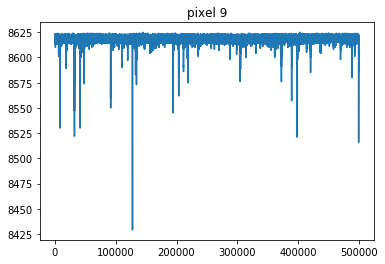

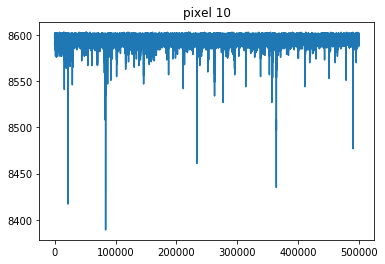

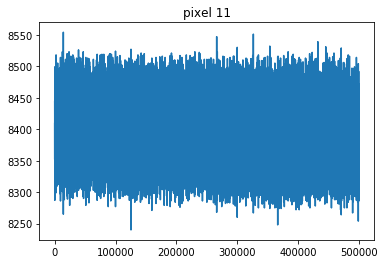

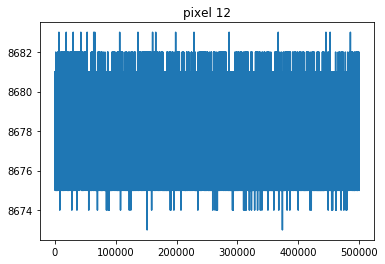

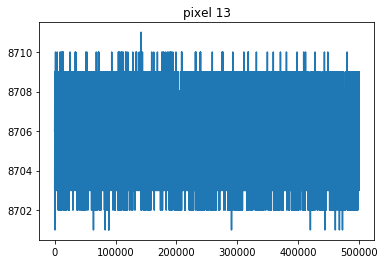

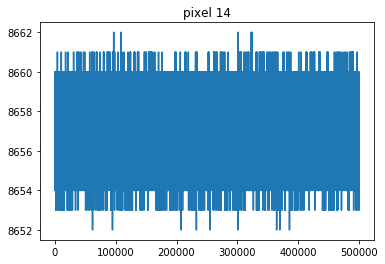

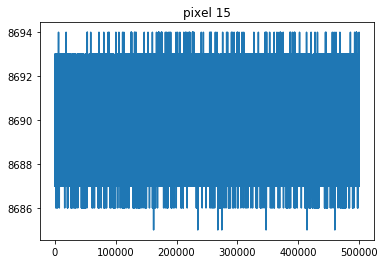

In [8]:
wavenum = 0
for i in range(len(pixels)):
    plt.plot(pixels[i][0])
    plt.title('pixel '+str(i))
    #plt.xlim(0,0)
    plt.show()

In [23]:
files = ['/home/daqpearl/raidStorage/raidStorage/NDTGamma/Dec2019/run44486.bin',
        '/home/daqpearl/raidStorage/raidStorage/NDTGamma/Dec2019/run44487.bin',
        '/home/daqpearl/raidStorage/raidStorage/NDTGamma/Dec2019/run44488.bin',
        '/home/daqpearl/raidStorage/raidStorage/NDTGamma/Dec2019/run44489.bin',
        '/home/daqpearl/raidStorage/raidStorage/NDTGamma/Dec2019/run44490.bin',
        '/home/daqpearl/raidStorage/raidStorage/NDTGamma/Dec2019/run44491.bin',
        '/home/daqpearl/raidStorage/raidStorage/NDTGamma/Dec2019/run44492.bin',
        '/home/daqpearl/raidStorage/raidStorage/NDTGamma/Dec2019/run44493.bin',
        '/home/daqpearl/raidStorage/raidStorage/NDTGamma/Dec2019/run44494.bin',
        '/home/daqpearl/raidStorage/raidStorage/NDTGamma/Dec2019/run44495.bin',
        '/home/daqpearl/raidStorage/raidStorage/NDTGamma/Dec2019/run44496.bin']

In [35]:
noiseSpectra = []
num = []

pixelList = [0,1,2,3,4,5]
length = 10000 #number of samples to take

for pixel in range(16):
    noiseSpectra.append(np.zeros(int(np.floor(length/2))+1))
    num.append(0)
xvals = 0

for file in files:
    #open the file
    data = df.dataFile(file)
    for pixel in pixelList:
        #grab all the waveforms for that one pixel
        pixeldata = data.getPixel(pixel)
        for wave in pixeldata:
            powerspec = signal.periodogram(wave[:length], fs = 10**8)
            noiseSpectra[pixel] = np.add(noiseSpectra[pixel], powerspec[1])
            num[pixel]+=1 
            xvals = powerspec[0]

for pixel in pixelList:
    noiseSpectra[pixel] = np.divide(noiseSpectra[pixel], num[pixel])

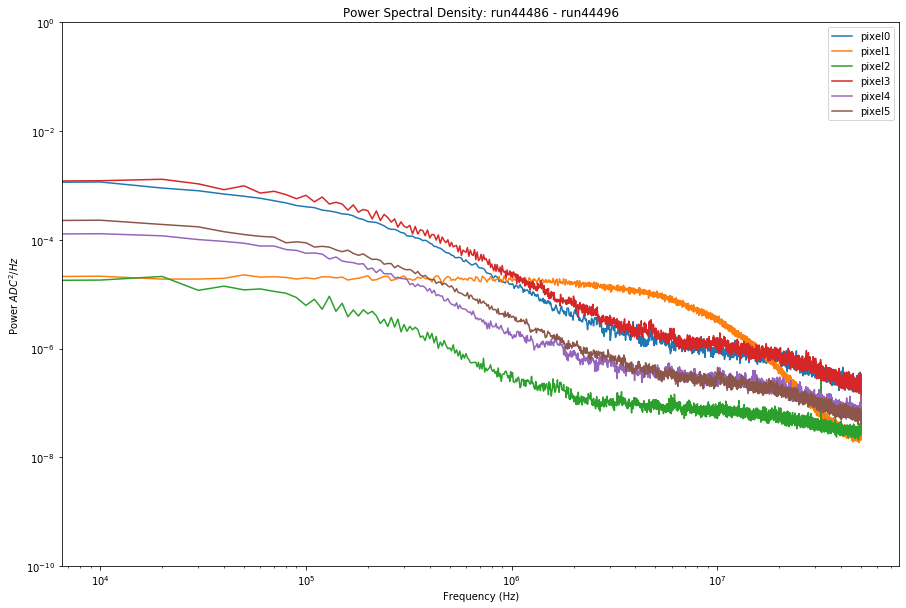

In [36]:
NUM_COLORS = len(pixelList)

cm = plt.get_cmap('magma')
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in pixelList:
    ax.plot(xvals, noiseSpectra[i], label='pixel'+str(i))
rcParams['figure.figsize'] = 15, 10
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Power Spectral Density: run44486 - run44496')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Power $ADC^2/Hz$')
plt.ylim(10**(-10), 1)
plt.show()

In [ ]:
'''
Try the trapezoidal filter on one of these waveforms.
'''
#parameters
pretrig = 10000
rise = 1250
top = 100
tau = 1250

windowLeft = 50000
windowRight = 50000


def trapezoidalFilter(rise, top, tau)
    filt = np.zeros(rise * 2 + top)
    for i in range(rise):
        filt[i] = i+tau
        filt[i+rise+top] = rise-tau-i
    for i in range(rise, rise+top):
        filt[i]=rise
    scale = 1.0/(rise * tau)
    filt*=scale
    return filt

originalFile = data.origFile()
pixel = originalFile.getPixel(0)
wave = pixel[0]
#do the baseline shift
wave = wave[:] - np.mean(wave[0:pretrig])

filt = trapezoidalFilter